In [1]:


import sys
sys.path.insert(1, './functions/')
import os
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from utility import create_folder


"""
0. Generate artificial data from bishop paper

Bishop data description:
t: a data set consisting of 300 points in 10 dimensions, in which the data is drawn from

x: a Gaussian distribution having standard deviation 1.0 in 3 directions
                              and standard deviation 0.5 in the remaining 7 directions.

t = Wx+\epsilon
\epsilon ~ N(0,\sigma^2 I_d)

"""
def generate_data(seed=1):
    np.random.seed(seed)
    N = 300
    y1 = np.random.normal(0,1, size = (3,N))
    y2 = np.random.normal(0,0.5, size = (7,N))
    y = np.vstack((y1,y2))
    y_var = np.var(y,axis = 1)
    idx = np.argsort(-y_var)
    y_sort = y[idx,:]
    return y_sort

def plot_data(y,savepath=None,save = True,figsize = (8,6)):

    if savepath is None:
        savepath = '../figs/artificial_data_1/'
    fig, ax = plt.subplots(figsize=figsize)
    ax1 =ax.imshow(y,aspect = 'auto', interpolation=None);
    plt.colorbar(ax1)
    plt.ylabel('Features')
    plt.xlabel('Samples')
    plt.title('Observations')
    figname = 'data1.pdf'
    if save:
        plt.savefig(os.path.join(savepath,figname),bbox_inches = 'tight')
    plt.show()




<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
/var/folders/v0/1k36rf054ln75rjntgqrdc_r0000gn/T/ipykernel_68938/3850647500.py:10: SyntaxWarning: invalid escape sequence '\e'
  """


In [2]:
scale = 5
cm2inch = 0.39
ssmall_SIZE = 3*scale
SMALL_SIZE = 4*scale
MEDIUM_SIZE = 6*scale
BIGGER_SIZE = 8*scale
LINE_WIDTH = 2*2
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('lines', linewidth=LINE_WIDTH)


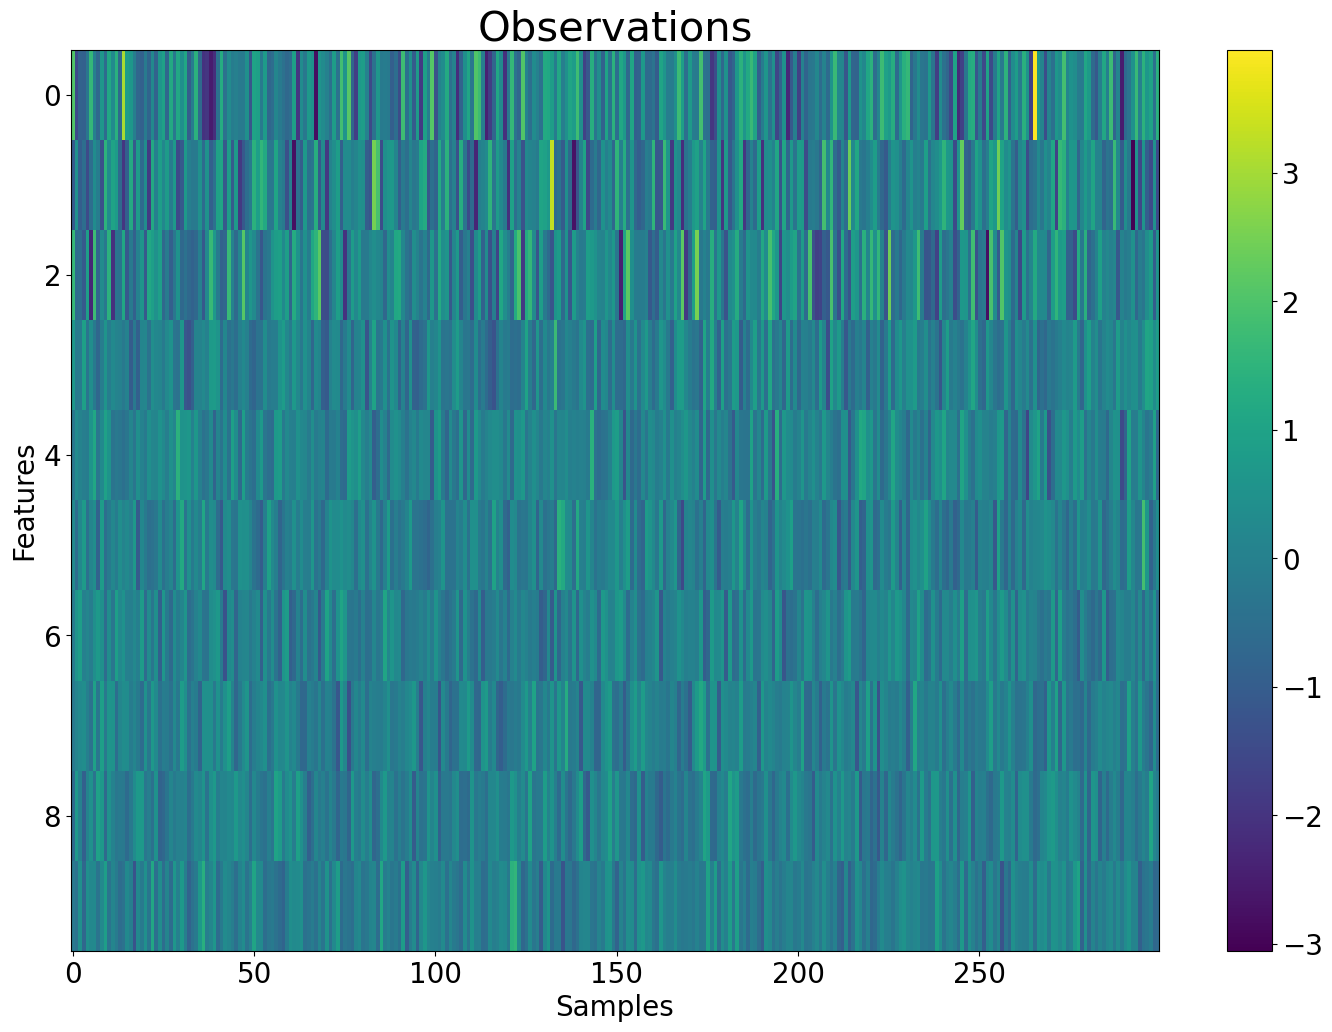

In [3]:

savepath = './figs/artificial_data_gaussian'
create_folder(savepath)
figsize_cm = (9,6)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
y = generate_data(seed=1)
fig, ax = plt.subplots(figsize=figsize)
ax1 =ax.imshow(y,aspect = 'auto', interpolation=None);
plt.colorbar(ax1)
plt.ylabel('Features')
plt.xlabel('Samples')
plt.title('Observations')
figname = 'data1.pdf'
plt.savefig(os.path.join(savepath,figname),bbox_inches = 'tight')
plt.show()

In [4]:
from fun_models_class import Models

In [5]:
model_names =['pca','mlpca','fa','bpca_common','bpca_individual','mbpca_common','mbpca_individual']
score_names  = ['lb','log_like','evs','mse','r2','nef','evs_y', 'mvds','mae']
# score_names  = ['evs_y','mse','nef']
savepath = './figs/artificial_data_gaussian'
method_seed = 100
models = Models(model_names = model_names, savepath = savepath)
z = np.zeros(y.shape)
models_results = models.fit(y,q = 3, z = z,seed=method_seed, score_names = score_names,
                            imshow_wxyq = False,verbose = False,
                             nef_tol  = 1e-2)

In [6]:
models_results['pca']['scores']

{'r2': 0.0,
 'evs': 0.0,
 'evs_y': 0.3119691498976963,
 'mse': 0.3008190850093323,
 'lb': 1e-05,
 'log_like': -9.176074476093985,
 'mvds': 0.09387717404366924,
 'mae': 0.2765000407777189,
 'nef': 9.0}

In [7]:
from fun_models_class import imshow_model_wxyq
xtick_s = False
framerate = 30
xtickgap = 2

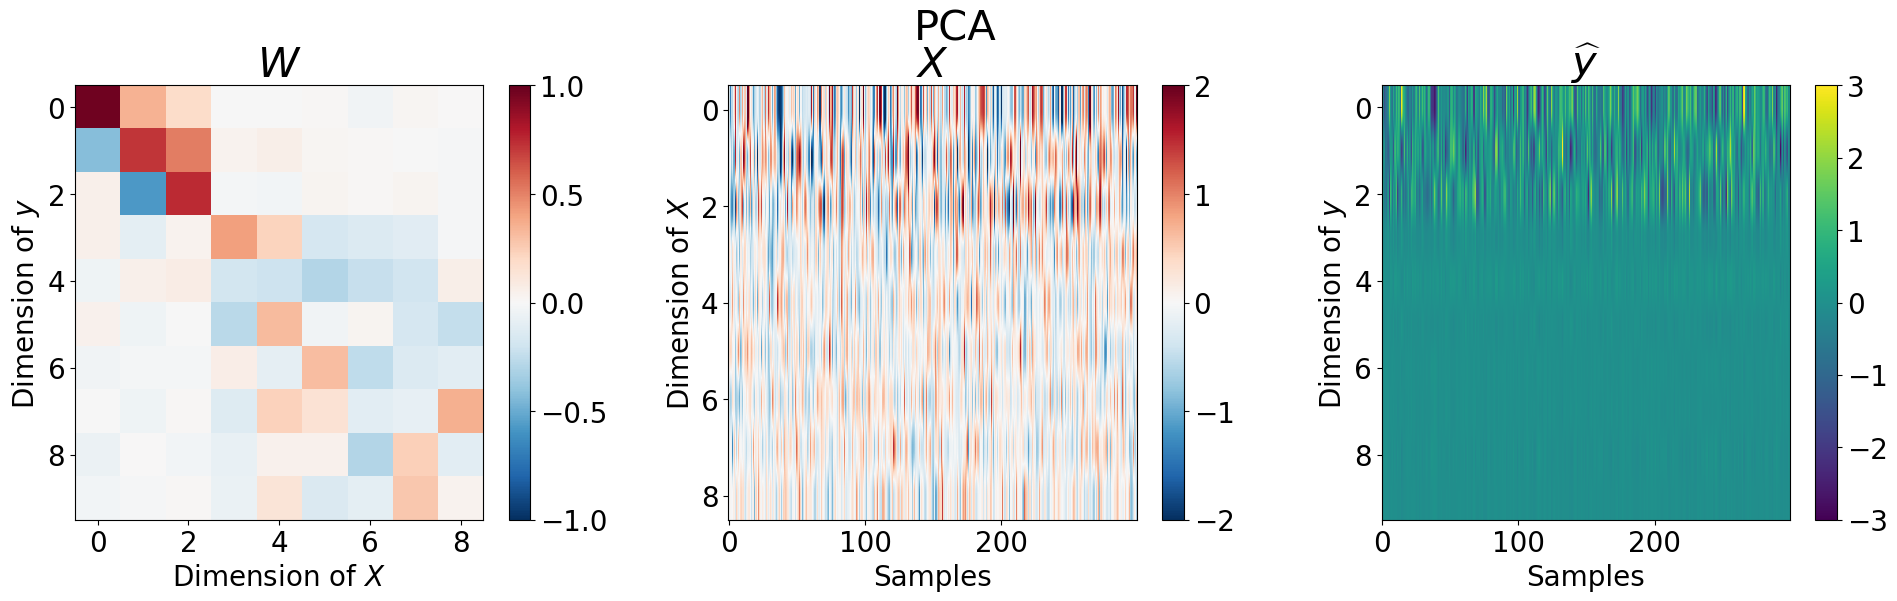

In [8]:
figsize_cm = (10,3.2)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)

imshow_model_wxyq(models_results, model_name ='pca',figsize =figsize , title ='PCA',
                  wmax = 1, xmax = 2 , ymax = 3, ymin = -3, savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

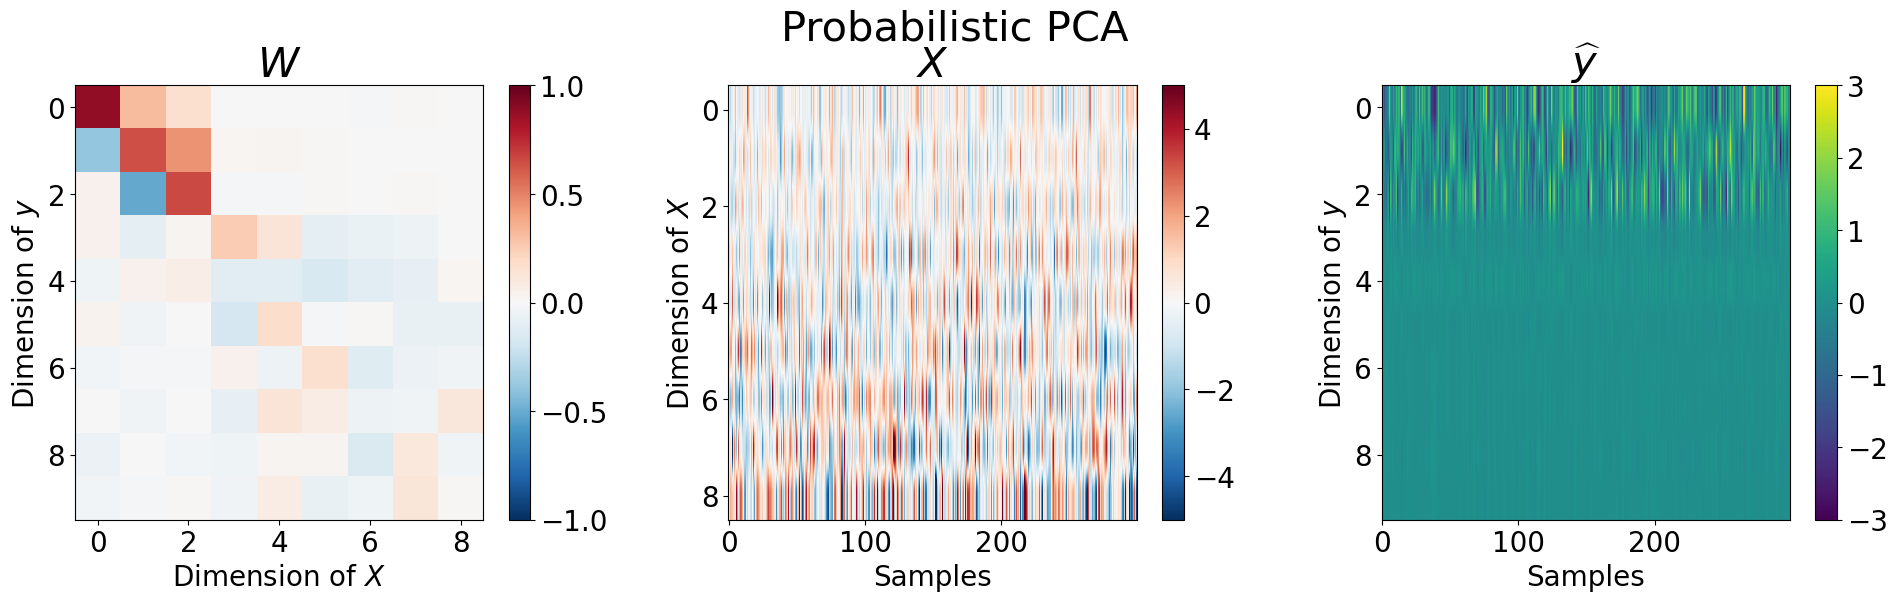

In [9]:
imshow_model_wxyq(models_results, model_name ='mlpca',figsize =figsize, title = 'Probabilistic PCA',
                wmax = 1, xmax = 5 , ymax = 3, ymin = -3,savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

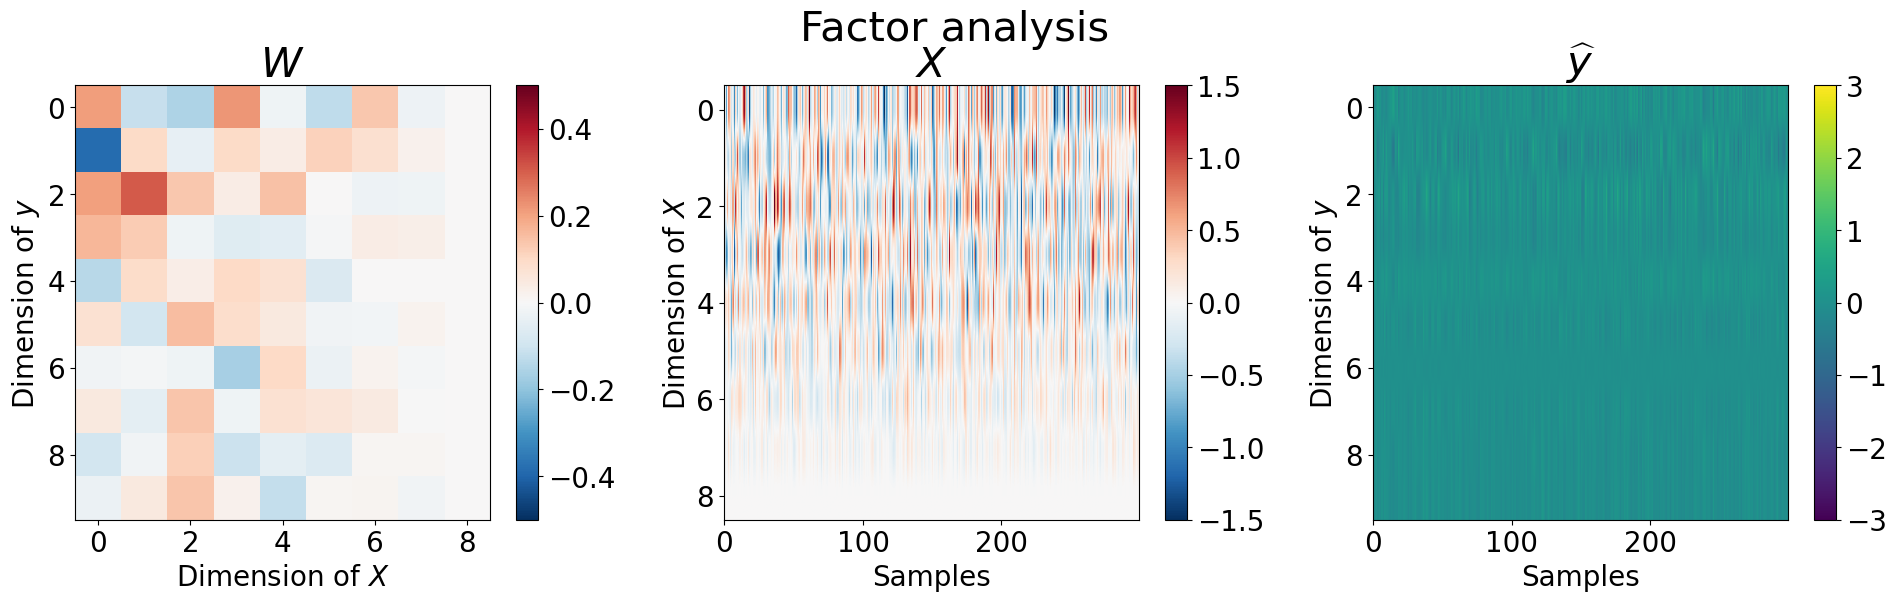

In [10]:
imshow_model_wxyq(models_results, model_name ='fa',title = 'Factor analysis',figsize =figsize, 
                  wmax = 0.5, xmax = 1.5 , ymax = 3, ymin = -3 ,savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

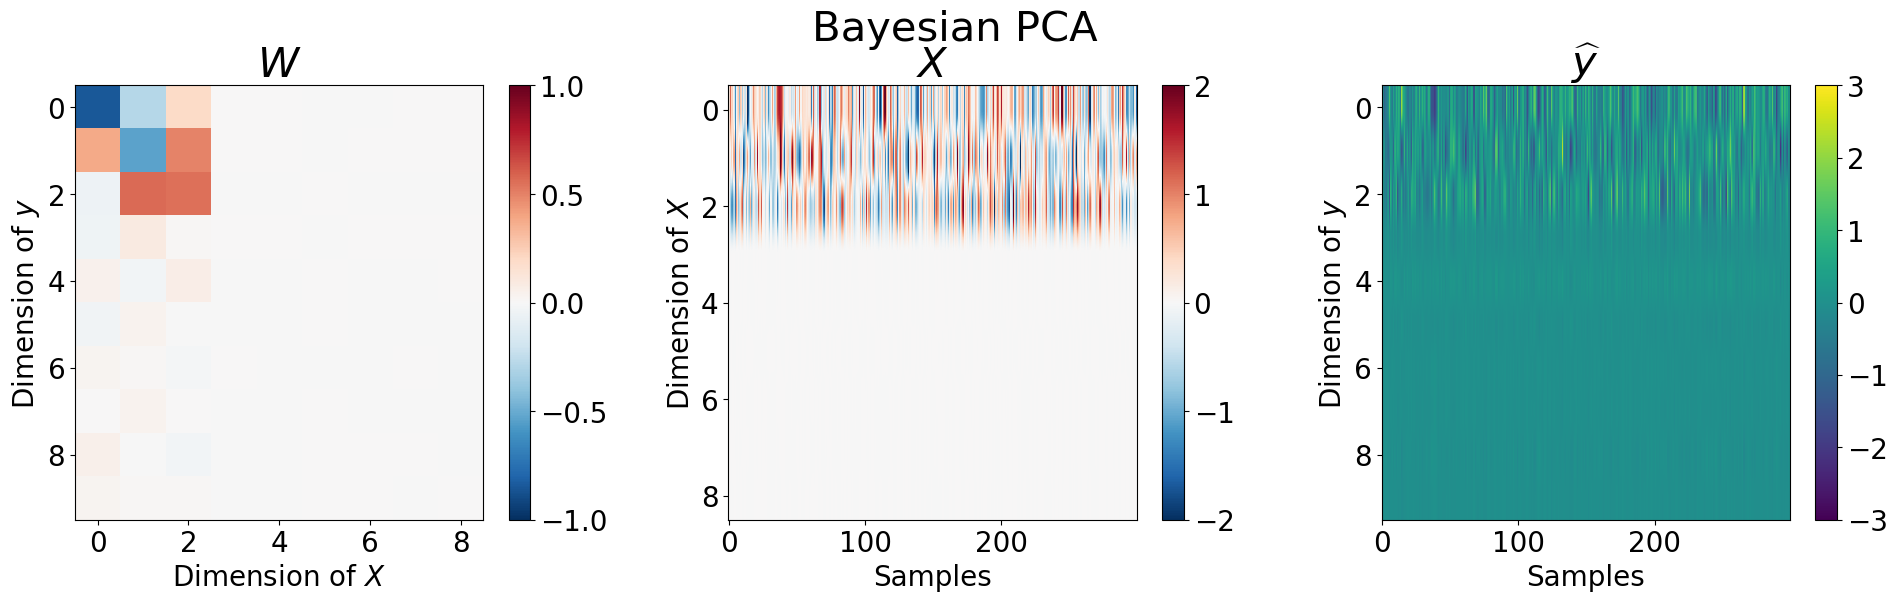

In [11]:
imshow_model_wxyq(models_results, model_name ='bpca_common',title = 'Bayesian PCA',figsize =figsize, 
                  wmax = 1, xmax = 2 , ymax = 3, ymin = -3 ,savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

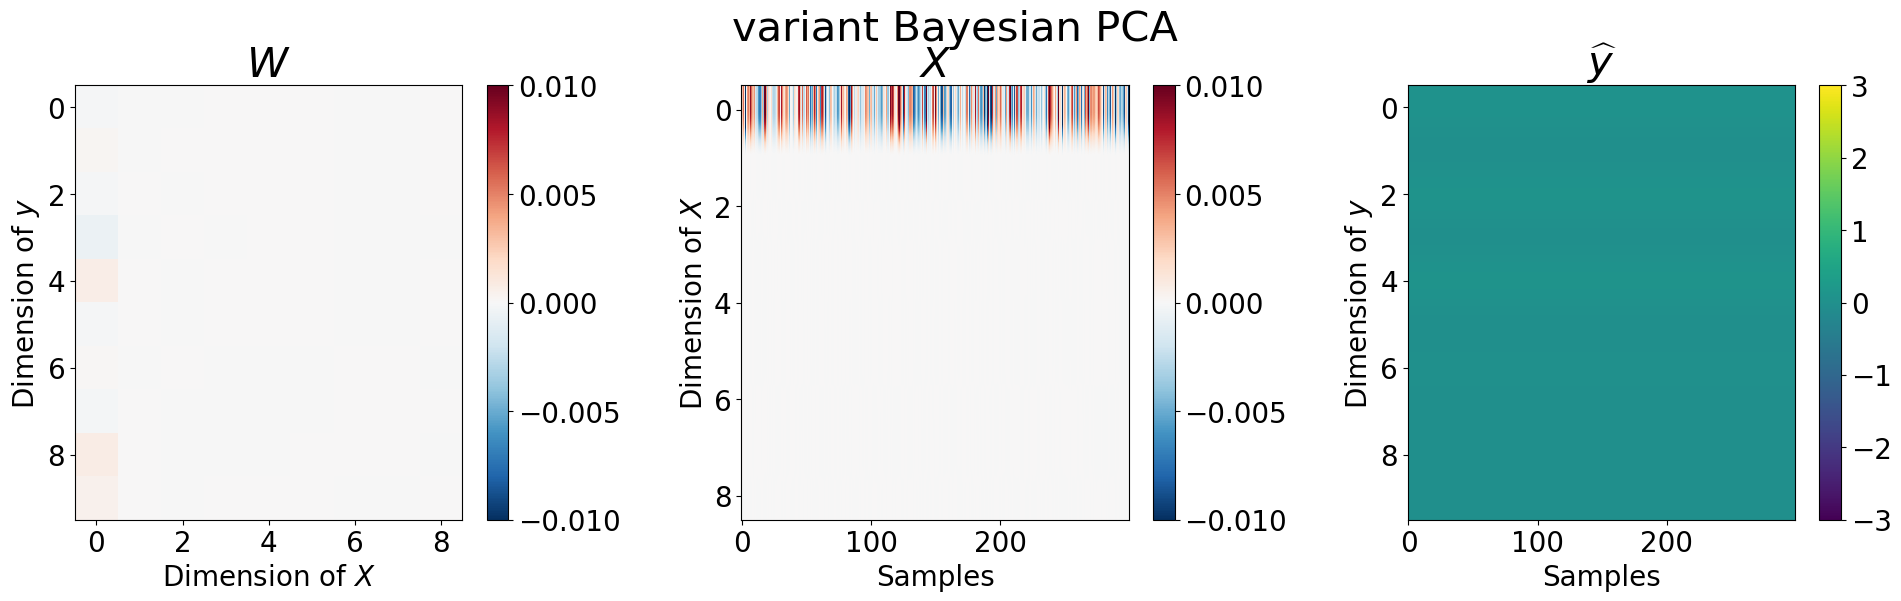

In [12]:
imshow_model_wxyq(models_results, model_name ='bpca_individual',title = 'variant Bayesian PCA',figsize =figsize, 
                  wmax =0.01, xmax = 0.01, ymax = 3, ymin = -3,savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

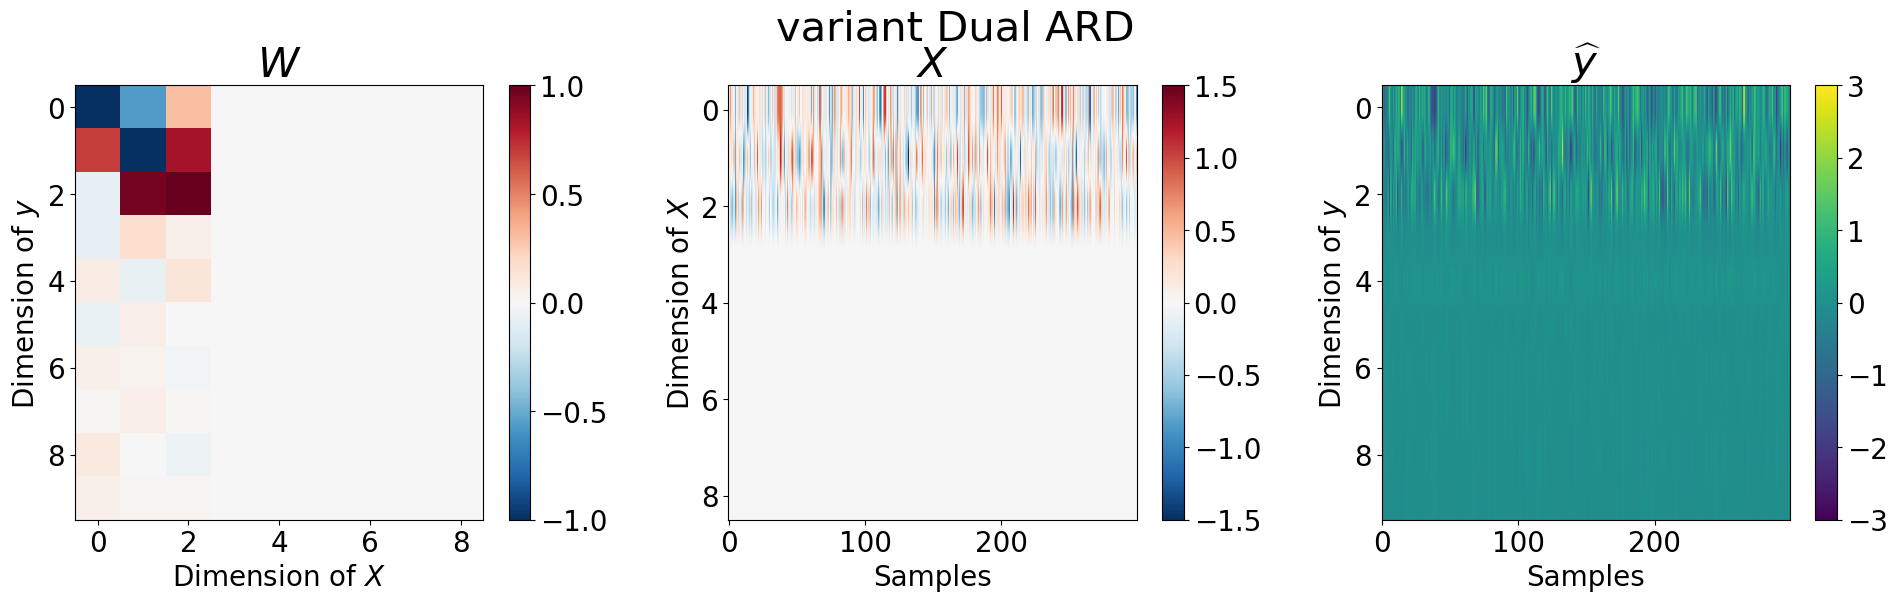

In [13]:
imshow_model_wxyq(models_results, model_name ='mbpca_common',
                  title = 'variant Dual ARD',figsize =figsize, 
                  wmax =1, xmax = 1.5, ymax = 3, ymin = -3,savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

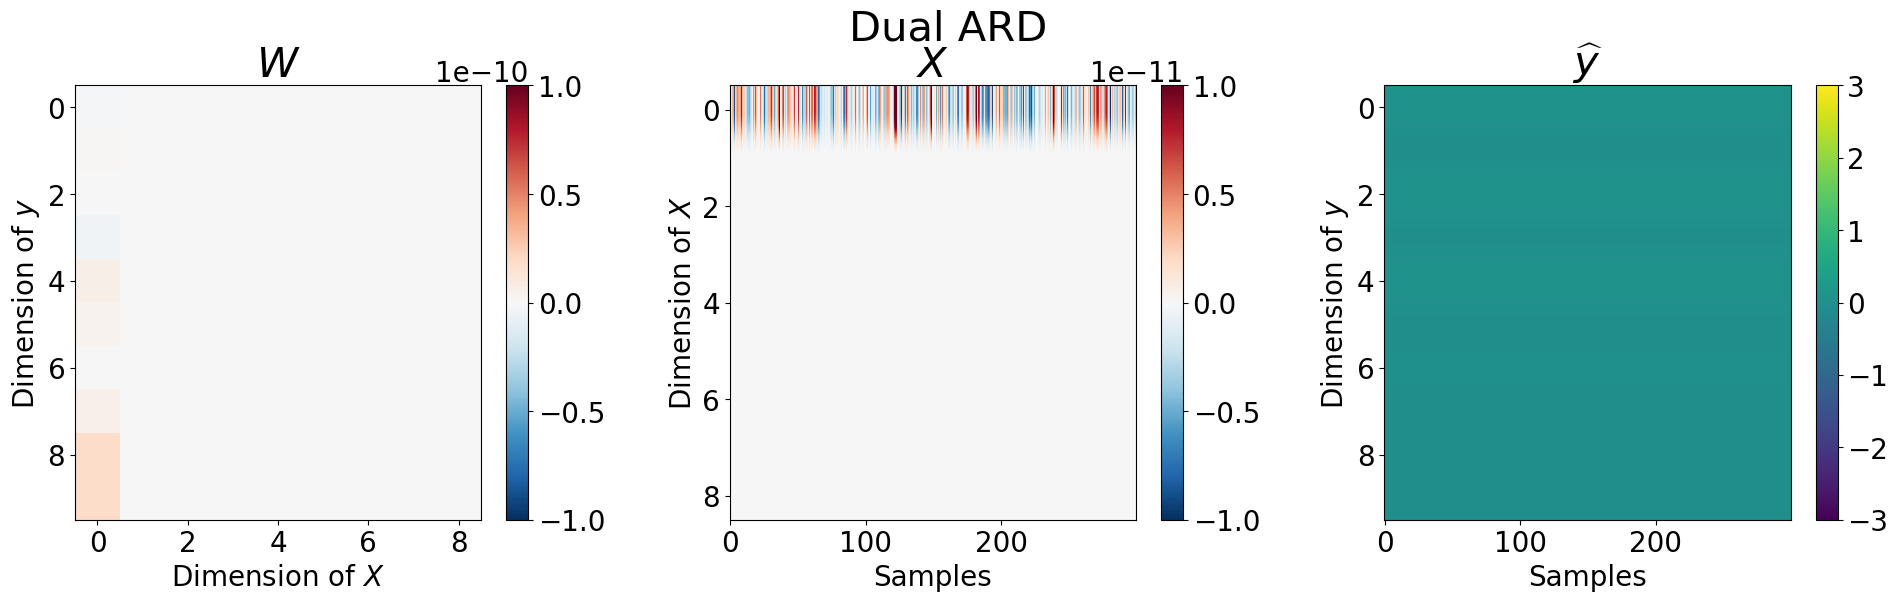

In [14]:
imshow_model_wxyq(models_results, model_name ='mbpca_individual',
                  title = 'Dual ARD ',figsize =figsize, 
                  wmax =1e-10, xmax = 1e-11, ymax = 3, ymin = -3,savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap = xtickgap)

In [15]:
import fun_models_class; reload(fun_models_class)
from fun_models_class import plot_model_comparison_twinx, get_model_name_labels,plot_model_comparsion

In [16]:
scores_models = dict()
for model_name in model_names:

    model_results = models_results[model_name]
    scores = model_results['scores']
    
    scores_models[model_name] = dict()
    for score_name in score_names:
        scores_models[model_name][score_name] = scores[score_name]
      


In [17]:
def plot_model_comparsion(score_models, score_name='evs',savepath = None,
                        ymin = None, ymax = None,
                         color ='k', ylabel='score', title =None,
                        figsize = (5,3), xticklabels = None):

    model_names = list(score_models.keys())
    score = np.zeros(len(model_names))
    for i in range(len(model_names)):
        model_name = model_names[i]
        score[i] = score_models[model_name][score_name]

    fig,ax = plt.subplots(figsize = figsize)
    ax.plot(score, 'o-', color =color)
    ax.set_ylim([ymin,ymax])
    ax.set_xticks(np.arange(len(model_names)))
    if xticklabels is None:
        xticklabels = model_names
    ax.set_xticklabels(xticklabels,rotation = 45)
    if title is None:
        title = score_name
    ax.set_title(title)
    ax.set_ylabel(ylabel)

    if savepath is not None:
        filename = score_name+'.pdf'
        figfile = os.path.join(savepath, filename)
        plt.savefig(figfile,bbox_inches='tight')
    plt.show()

In [18]:
figsize_cm = (7, 5)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
savepath = './figs/artificial_data_gaussian'
model_name_labels = get_model_name_labels(model_names)

# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plot_model_comparsion(scores_models, score_name='evs_y', figsize = figsize,
#                       xticklabels = model_name_labels, 
#                       title ='Explanined variance score (EVS)',
#                       savepath = savepath)

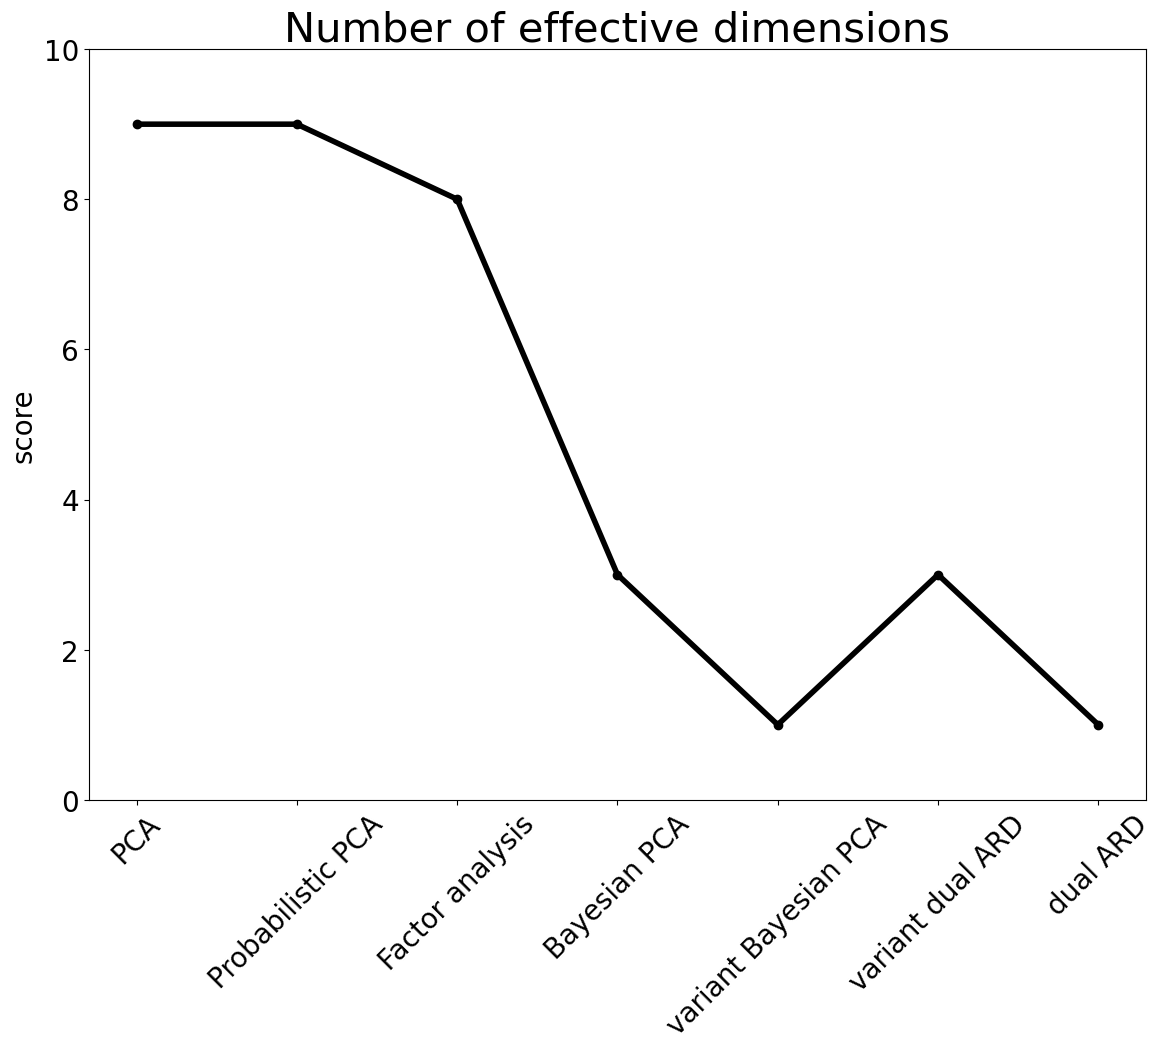

In [19]:
plot_model_comparsion(scores_models, score_name='nef', figsize = figsize,
                      xticklabels = model_name_labels, 
                      title ='Number of effective dimensions',
                      ymin = 0, ymax = 10,savepath=savepath)

/Users/yuzhe-li/Desktop/dual_ard_paper/functions/fun_plots.py:185: SyntaxWarning: invalid escape sequence '\h'
  plt.title('$\hat{y}$ (variance explained:'+str(int(var_explained))+'%'+'\n'+'corrlation with y: '+str(round(cc, 2))+', MSE: '+str(round(mse,4)));
/Users/yuzhe-li/Desktop/dual_ard_paper/functions/fun_plots.py:217: SyntaxWarning: invalid escape sequence '\h'
  ax[i].plot(y_effective[i,:],label ='$\hat y_{effective}$');
/Users/yuzhe-li/Desktop/dual_ard_paper/functions/fun_plots.py:219: SyntaxWarning: invalid escape sequence '\h'
  ax[i].plot(y_[i,:],label ='$\hat y$');
/Users/yuzhe-li/Desktop/dual_ard_paper/functions/fun_plots.py:389: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')
/Users/yuzhe-li/Desktop/dual_ard_paper/functions/fun_plots.py:390: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle('$P(\mu)$')


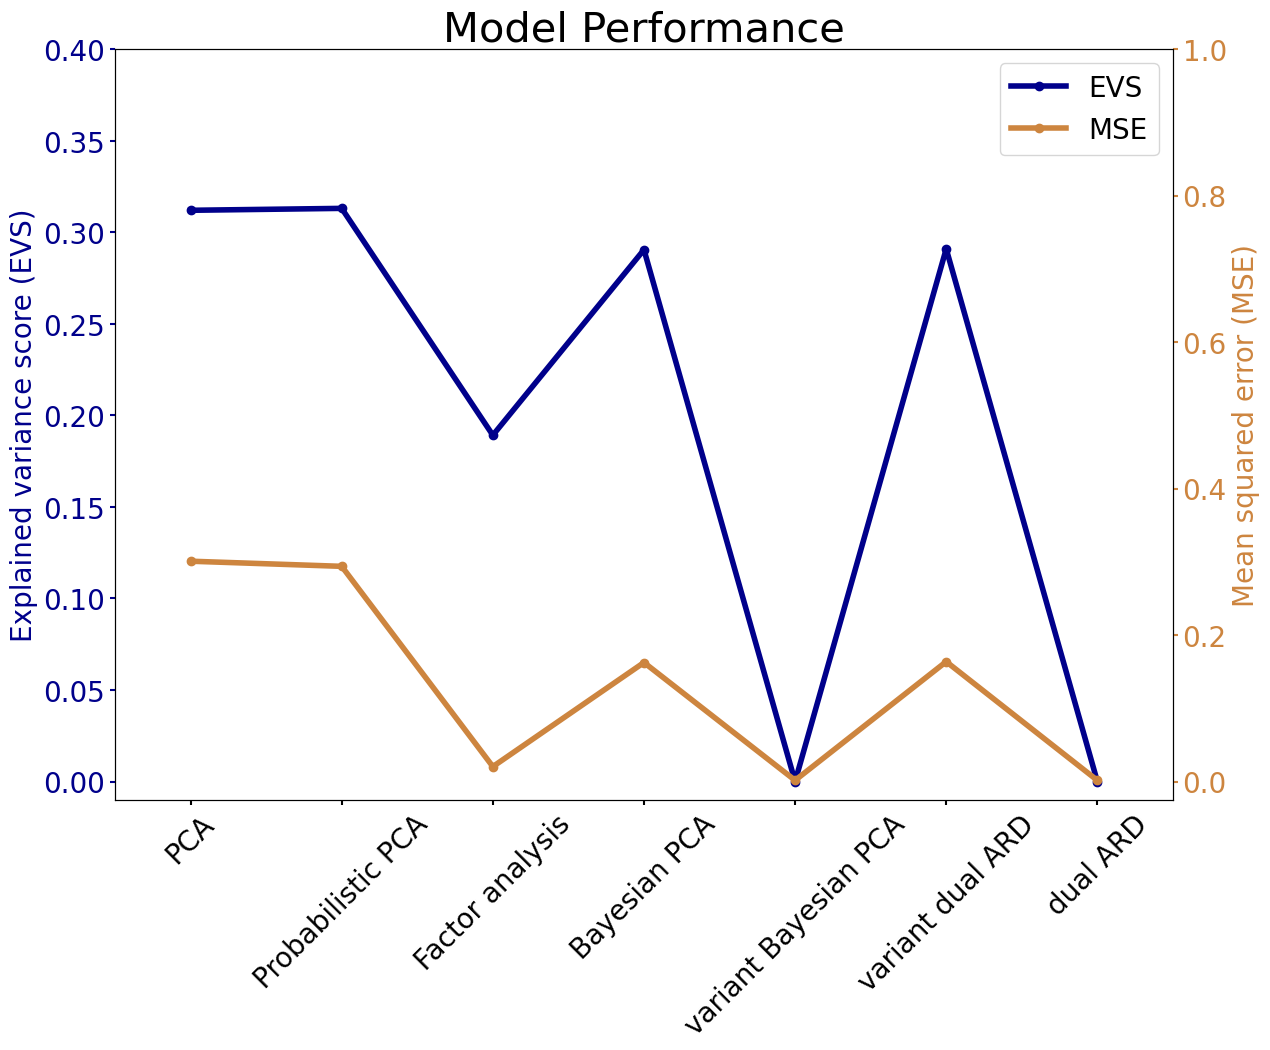

In [20]:
reload(fun_models_class); from fun_models_class import plot_model_comparison_twinx
plot_model_comparison_twinx(scores_models, 
                                figsize = figsize,
                                xticks = model_name_labels, 
                                score_names =['evs_y','mse'],
                                labels =['EVS','MSE'],
                                ylabels =['Explained variance score (EVS)','Mean squared error (MSE)'],
                                ylims = ([-0.01, 0.4], [-0.025,1]),
                                ticksize = None,
                                savepath = savepath,
                                loc ='best'
                                )

In [21]:
model_results['scores'].keys()

dict_keys(['r2', 'evs', 'evs_y', 'mse', 'lb', 'log_like', 'mvds', 'mae', 'nef'])

In [22]:
scores_models = dict()
for model_name in model_names:

    model_results = models_results[model_name]
    scores = model_results['scores']
    
    scores_models[model_name] = dict()
    sigma2 = model_results['sigma2']
    if np.isscalar(sigma2):
        sigma2 = sigma2*np.ones(model_results['X'].shape[0]+1)
    scores_models[model_name]['sigma2'] = sigma2
    for score_name in score_names:
        scores_models[model_name][score_name] = scores[score_name]
      


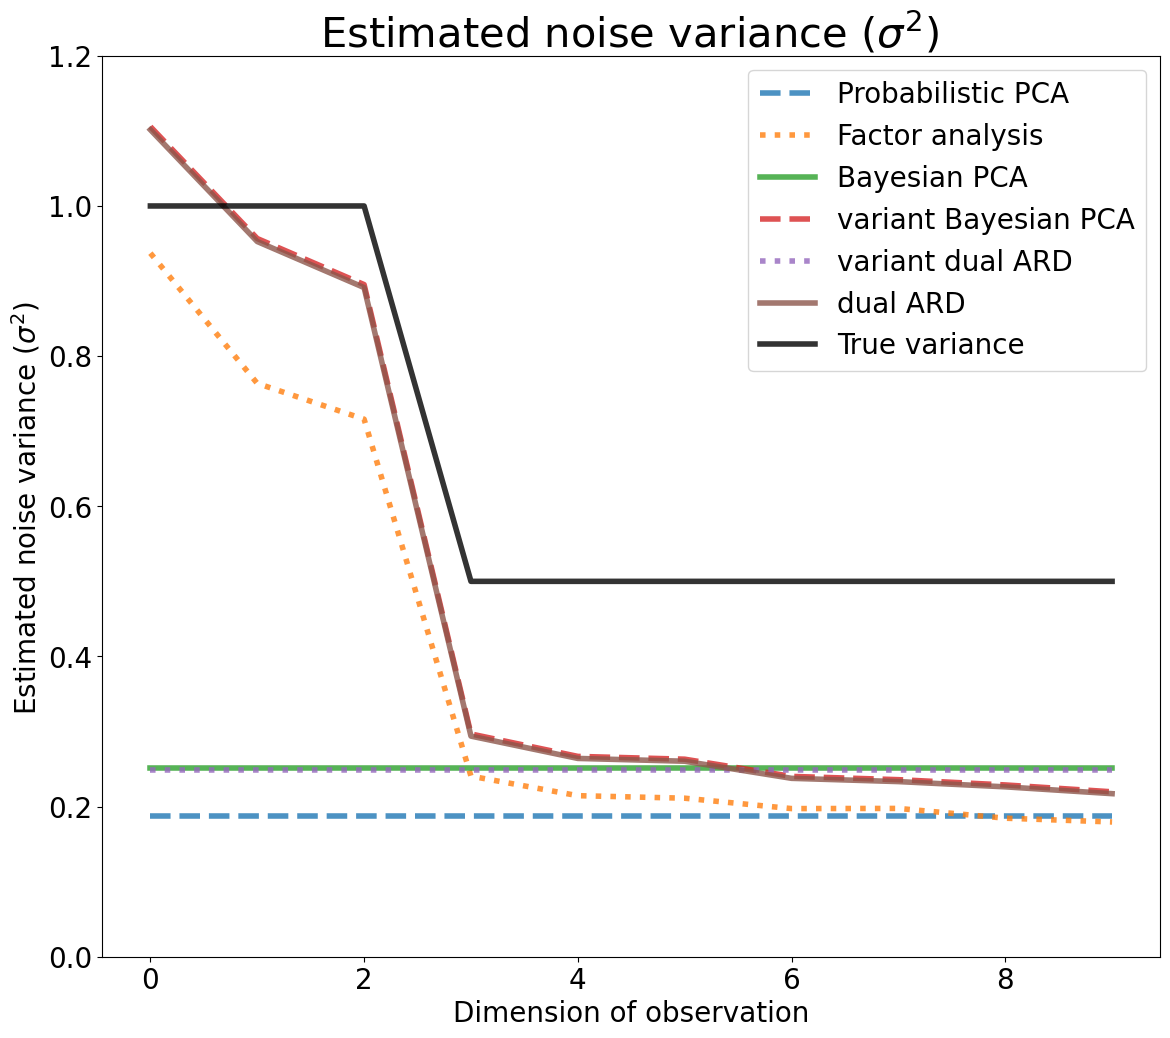

In [23]:
figsize_cm = (7, 6)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
fig, ax = plt.subplots(figsize = figsize )
linestyles = ['solid','dashed','dotted',]*3
true_sigma2 = np.array([1]*3+[0.5]*7)
for i in np.arange(1,len(model_names)): 
    model_name = model_names[i]
    linestyle =linestyles[i]
    
    sigma2 = scores_models[model_name]['sigma2']
    ax.plot(sigma2, label = model_name_labels[i],
            alpha = 0.8, linestyle = linestyle)

ax.plot(true_sigma2, label = 'True variance', alpha = 0.8, c='k')
ax.set_ylim([0,1.2])
ax.set_xlabel('Dimension of observation')
ax.set_ylabel(r'Estimated noise variance ($\sigma^2$) ')
ax.set_title(r'Estimated noise variance ($\sigma^2$) ')
figname = os.path.join(savepath,'sigma2.pdf')
plt.legend()
fig.savefig(figname,bbox_inches ='tight')
plt.show()